# Exploração de camadas para enriquecimento 

## Setup inicial e funções auxiliares

Primeiro, mudo o working directory para um nível anterior para poder utilizar o módulo hydra

In [1]:
%cd '..'

/git/hydra


In [2]:
import pickle
import s3fs
from dotenv import load_dotenv
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from hydra.utils import geosampa_client

sns.set_theme(rc={'patch.linewidth': 0.1})

load_dotenv()

def load_asset(asset_name:str) -> pd.DataFrame|gpd.GeoDataFrame:
    s3 = s3fs.S3FileSystem(endpoint_url='http://localhost:9000/')
    with s3.open(f'bronze-db/dagster/{asset_name}', 'rb') as f:
        obj = pickle.load(f)
    if isinstance(obj, gpd.GeoDataFrame):
        obj = obj.set_crs(epsg=31983)
    return obj

def contorno(gdf:gpd.GeoDataFrame, color='gray', **kwargs):
    return gdf.dissolve().boundary.plot(color=color, **kwargs)

def load_from_geosampa(schema:str) -> gpd.GeoDataFrame:
    camada = geosampa_client.get_client().get_feature(schema)
    
    gdf = gpd.GeoDataFrame.from_features(camada['features'])
    gdf = gdf.set_crs(camada['crs'].get('properties').get('name'))
    gdf = gdf.to_crs(epsg=31983)
    return gdf

/home/d855395/jupyter_env/lib/python3.10/site-packages/dagster/_core/definitions/auto_materialize_policy.py:171: ExperimentalWarning: Class `AutoMaterializePolicy` is experimental. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  return AutoMaterializePolicy(


In [3]:
%matplotlib inline

## Lista de camadas disponíveis

Primeiro eu carrego os dados direto do bucket do dagster

In [4]:
camadas_minio = s3fs.S3FileSystem(endpoint_url='http://localhost:9000/').ls('bronze-db/dagster')
camadas_minio

INFO:aiobotocore.credentials:Found credentials in environment variables.


['bronze-db/dagster/Basico_SP1',
 'bronze-db/dagster/Domicilio01_SP1',
 'bronze-db/dagster/GEOSAMPA_cadparcs_area_protecao_apa',
 'bronze-db/dagster/GEOSAMPA_cadparcs_parque_estadual',
 'bronze-db/dagster/GEOSAMPA_cadparcs_parque_outra_secretaria',
 'bronze-db/dagster/GEOSAMPA_cadparcs_reserva_particular_natural',
 'bronze-db/dagster/GEOSAMPA_cadparcs_unidade_conservacao_existente',
 'bronze-db/dagster/GEOSAMPA_terra_indigena',
 'bronze-db/dagster/area_contaminada_reabilitada_svma',
 'bronze-db/dagster/area_inundavel',
 'bronze-db/dagster/area_risco_geologico',
 'bronze-db/dagster/arquivo_zip_censo',
 'bronze-db/dagster/basico_digest',
 'bronze-db/dagster/classificacao_viaria_cet',
 'bronze-db/dagster/decreto_utilidade_publica_interesse_social',
 'bronze-db/dagster/distrito_municipal',
 'bronze-db/dagster/domicilio01_digest',
 'bronze-db/dagster/geoconvias_faixa_nao_edificavel',
 'bronze-db/dagster/geoconvias_lei_melhoramento_vigente',
 'bronze-db/dagster/linha_alta_tensao',
 'bronze-d

Agora, exibo as camadas adicionais pelo client do geosampa

In [5]:
gs_client = geosampa_client.get_client()
camadas_geosampa = list(gs_client.get_feature_schemas().keys())
[c for c in camadas_geosampa if c not in camadas_minio]

/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_cortico_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_favela_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_loteamento_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_nucleo_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geotecnica_linha
  warnings.warn(f"Could not i

['GEOSAMPA_cadparcs_area_protecao_apa',
 'GEOSAMPA_cadparcs_parque_estadual',
 'GEOSAMPA_cadparcs_parque_outra_secretaria',
 'GEOSAMPA_cadparcs_reserva_particular_natural',
 'GEOSAMPA_cadparcs_unidade_conservacao_existente',
 'GEOSAMPA_heliponto',
 'GEOSAMPA_terra_indigena',
 'GEOSAMPA_zoneamento_geoambiental_apa_cm',
 'acessibilidade_smped',
 'acidente_cet',
 'adesampa',
 'agencia_funeraria',
 'aiu_vl_alinhamento_viario',
 'aiu_vl_perimetro_adesao',
 'aiu_vl_projeto_especifico',
 'aiu_vl_zeis1',
 'alinhamento_viario_aiu',
 'apoio_terrestre',
 'area_cedida',
 'area_contaminada_reabilitada_svma',
 'area_contexto',
 'area_influencia_metro',
 'area_influencia_trem',
 'area_inundavel',
 'area_publica_cgpatri',
 'area_qualificacao_transformacao_aiu',
 'area_risco_geologico',
 'area_verde_aiu',
 'arruamento_aprovado',
 'arruamento_regularizado',
 'articulacao_folha_aiu',
 'arvore',
 'aterro_rcc',
 'aterro_sanitario',
 'bacia_hidrografica',
 'bicicletario_paraciclo',
 'calcada',
 'caps_ad',
 

## Tabela de camadas e propriedades escolhidas

Para facilitar a exposição posterior, vou definir aqui as camadas a serem utilizadas e as condições de utilização

In [6]:
camadas = {
    'area_contaminada_reabilitada_svma': {
        'propriedades': ', '.join([
            'geometry',
            'cd_identificador_area_contaminada_reabilitada',
            'dc_classificacao_area_contaminada',
            'dc_tipo_terreno_area_contaminada',
            'dc_uso_anterior_geral',
            'dc_uso_pretendido_geral',
            'tx_contaminante',
            'tx_restricao'
        ]),
        'condicao': 'cd_identificador_area_contaminada_reabilitada != reabilitada'
    },
    'area_inundavel': {
        'propriedades': 'geometry'
    },
    'distrito_municipal': {
        'propriedades': ', '.join([
            'geometry',
            'cd_identificador_distrito',
            'cd_distrito_municipal',
            'cd_identificador_subprefeitura',
            'nm_distrito_municipal',
            'sg_distrito_municipal'
        ]),
        'observacoes': 'As camadas de distrito e subprefeituras podem ser unidas pela coluna `cd_identificador_subprefeitura`, não precisando de processamento geoespacial'
    },
    'subprefeitura': {
        'propriedades': ', '.join([
            'geometry',
            'cd_identificador_subprefeitura',
            'cd_subprefeitura',
            'nm_subprefeitura',
            'sg_subprefeitura'
        ]),
        'observacoes': 'As camadas de distrito e subprefeituras podem ser unidas pela coluna `cd_identificador_subprefeitura`, não precisando de processamento geoespacial'
    },
    'GEOSAMPA_cadparcs_area_protecao_apa': {
        'propriedades': ', '.join([
            'geometry',
            'nm_esfera_administrativa',
            'nm_area_protecao_ambiental',
            'tx_instrumento_legal_criacao'
        ])
    },
    'mananciais*': {
        'propriedades': ', '.join([
            'geometry',
            'dc_classe',
            'sg_classe',
            'dc_area_especial',
            'nm_bacia'
        ]),
        'observacoes': 'Essa camada consiste na concatenação das 3 camadadas de mananciais'
    },
    'remanescente_pmma': {
        'propriedades': ', '.join([
            'geometry',
            'cd_classe_vegetacao',
            'dc_classe_vegetacao'
        ])
    },
    'represa_nivel_maximo': {
        'propriedades': ', '.join([
            'geometry',
            'nm_acidente'
        ])
    },
    'transpetro_duto': {
        'propriedades': 'geometry'
    },
    'risco_ocorrencia_alagamento': {
        'propriedades': ', '.join([
            'geometry',
            'dt_ocorrencia',
            'dc_tipo_ocorrencia'
        ])
    },
    'risco_ocorrencia_inundacao': {
        'propriedades': ', '.join([
            'geometry',
            'dt_ocorrencia',
            'dc_tipo_ocorrencia'
        ])
    },
    'massa': {
        'propriedades': ', '.join([
            'geometry',
            'cd_identificador_hidrografia_poligono',
            'nm_acidente',
            'cd_tipo_acidente'
        ])
    }
}

df_camadas = pd.DataFrame(camadas).T
df_camadas.to_excel('notebooks/camadas.xlsx', index=True)
df_camadas

,propriedades,condicao,observacoes
area_contaminada_reabilitada_svma,"geometry, cd_identificador_area_contaminada_re...",cd_identificador_area_contaminada_reabilitada ...,NaN
area_inundavel,geometry,NaN,NaN
distrito_municipal,"geometry, cd_identificador_distrito, cd_distri...",NaN,As camadas de distrito e subprefeituras podem ...
subprefeitura,"geometry, cd_identificador_subprefeitura, cd_s...",NaN,As camadas de distrito e subprefeituras podem ...
GEOSAMPA_cadparcs_area_protecao_apa,"geometry, nm_esfera_administrativa, nm_area_pr...",NaN,NaN
mananciais*,"geometry, dc_classe, sg_classe, dc_area_especi...",NaN,Essa camada consiste na concatenação das 3 cam...
remanescente_pmma,"geometry, cd_classe_vegetacao, dc_classe_veget...",NaN,NaN
represa_nivel_maximo,"geometry, nm_acidente",NaN,NaN
transpetro_duto,geometry,NaN,NaN
risco_ocorrencia_alagamento,"geometry, dt_ocorrencia, dc_tipo_ocorrencia",NaN,NaN


## Exploração das camadas para escolha

Para registro, deixarei aqui a exploração das camadas que levaram às decisões registradas acima

### Área contaminada

In [7]:
area_contaminada = load_asset('area_contaminada_reabilitada_svma')
area_contaminada

,geometry,cd_identificador_area_contaminada_reabilitada,cd_identificador_original,tx_endereco_area_contaminada,dc_classificacao_area_contaminada,in_cadastro_sigac,in_cadastro_cetesb,in_cadastro_sipol,dt_inclusao_cadastro,dt_modificacao_cadastro,dc_tipo_terreno_area_contaminada,dc_uso_anterior_geral,dc_uso_pretendido_geral,cd_cep_area_contaminada,tx_contaminante,tx_restricao,tx_intervencao
0,"MULTIPOLYGON (((322487.615 7397156.528, 322590...",76,76,"Avenida Mofarrej, 275",Reabilitada,Não,Sim,Não,2010-11-22T03:00:00Z,2018-05-07T03:00:00Z,Particular,Indústria,Uso Residencial,05311000,Gases,Água Subterrânea,"Extração de vapores do solo (SVE), Monitoramen..."
1,"MULTIPOLYGON (((355955.096 7401102.685, 356072...",89,89,"Avenida Marechal Tito, 3795",Contaminada Sob Investigação,Sim,Sim,Não,2010-11-22T03:00:00Z,2021-12-23T03:00:00Z,Particular,Indústria,Não Definido,08115000,TPH,None,None
2,"MULTIPOLYGON (((332886.572 7380439.650, 332877...",379,379,"Rua Padre Antônio Gouveia, 217",Contaminada,Sim,Não,Não,2013-04-12T03:00:00Z,2018-05-09T03:00:00Z,Particular,Depósito,Uso Não Residencial,04416200,Metais,None,None
3,"MULTIPOLYGON (((332469.880 7388103.233, 332445...",596,596,"Avenida Senador Casimiro da Rocha, 840",Contaminada Sob Investigação,Sim,Sim,Sim,2015-08-21T03:00:00Z,2018-05-11T03:00:00Z,Particular,Posto de Combustível,Uso Residencial,04047002,Solventes Aromáticos,Água Subterrânea,None
4,"MULTIPOLYGON (((339373.821 7396332.111, 339367...",1114,1093,"Avenida Celso Garcia, 3999",Reabilitada,Sim,Sim,Sim,2022-11-03T03:00:00Z,2022-11-03T03:00:00Z,Particular,Posto de Combustível,Uso Não Residencial,03063000,"Combustíveis Líquidos, PAH's, Solventes Aromát...",Água Subterrânea,"Extração multifásica, Monitoramento ambiental"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,"MULTIPOLYGON (((339951.008 7393363.568, 340032...",41,41,"Rua Araribá, 268, 272, 306",Reabilitada,Sim,Sim,Não,2010-11-22T03:00:00Z,2021-11-22T03:00:00Z,Particular,Indústria,Uso Residencial,03347020,"Ftalatos, Metais, PCB's, Solventes Aromáticos,...","Água Subterrânea, Plantio e Consumo de Aliment...","Extração multifásica, Impermeabilização de Sol..."
705,"MULTIPOLYGON (((335223.523 7386770.498, 335208...",107,107,"Rua do Boqueirão, 367 e 383",Reabilitada,Sim,Não,Não,2010-11-22T03:00:00Z,2018-05-07T03:00:00Z,Particular,Indústria,Uso Residencial,04293000,"Metais, Solventes Halogenados",Água Subterrânea,None
706,"MULTIPOLYGON (((336262.635 7383290.814, 336262...",780,780,"Avenida dos Ourives, 1145",Contaminada,Sim,Sim,Sim,2017-11-14T03:00:00Z,2020-11-30T03:00:00Z,Particular,Posto de Combustível,Não Definido,04194260,Solventes Aromáticos,None,None
707,"MULTIPOLYGON (((337402.754 7393756.118, 337387...",703,703,Rua Marquês de Valença,Reabilitada,Sim,Não,Sim,2016-10-17T03:00:00Z,2018-05-11T03:00:00Z,Particular,Outros,Uso Residencial,03182040,"Metais, TPH",None,None


In [8]:
area_contaminada = area_contaminada[area_contaminada['dc_classificacao_area_contaminada']!='Reabilitada']
area_contaminada

,geometry,cd_identificador_area_contaminada_reabilitada,cd_identificador_original,tx_endereco_area_contaminada,dc_classificacao_area_contaminada,in_cadastro_sigac,in_cadastro_cetesb,in_cadastro_sipol,dt_inclusao_cadastro,dt_modificacao_cadastro,dc_tipo_terreno_area_contaminada,dc_uso_anterior_geral,dc_uso_pretendido_geral,cd_cep_area_contaminada,tx_contaminante,tx_restricao,tx_intervencao
1,"MULTIPOLYGON (((355955.096 7401102.685, 356072...",89,89,"Avenida Marechal Tito, 3795",Contaminada Sob Investigação,Sim,Sim,Não,2010-11-22T03:00:00Z,2021-12-23T03:00:00Z,Particular,Indústria,Não Definido,08115000,TPH,None,None
2,"MULTIPOLYGON (((332886.572 7380439.650, 332877...",379,379,"Rua Padre Antônio Gouveia, 217",Contaminada,Sim,Não,Não,2013-04-12T03:00:00Z,2018-05-09T03:00:00Z,Particular,Depósito,Uso Não Residencial,04416200,Metais,None,None
3,"MULTIPOLYGON (((332469.880 7388103.233, 332445...",596,596,"Avenida Senador Casimiro da Rocha, 840",Contaminada Sob Investigação,Sim,Sim,Sim,2015-08-21T03:00:00Z,2018-05-11T03:00:00Z,Particular,Posto de Combustível,Uso Residencial,04047002,Solventes Aromáticos,Água Subterrânea,None
6,"MULTIPOLYGON (((355701.895 7395578.342, 355719...",1125,1122,"Avenida Salvador Gianetti, 920",Contaminada Sob Investigação,Sim,Sim,Sim,2023-05-29T03:00:00Z,2023-07-07T03:00:00Z,Particular,Posto de Combustível,Uso Não Residencial,08410000,Combustíveis Líquidos,Água Subterrânea,Monitoramento ambiental
9,"MULTIPOLYGON (((341169.478 7396683.652, 341196...",745,745,"Rua Santa Teresinha, 204; Rua Adelino de Almei...",Contaminada Sob Investigação,Sim,Não,Sim,2017-04-06T03:00:00Z,2018-05-11T03:00:00Z,Particular,Atividade potencial,Uso Residencial,03073050,Outros,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,"MULTIPOLYGON (((338414.318 7384838.647, 338113...",368,368,"Avenida Abrahão Gonçalves Braga, 4",Em Processo de Monitoramento para Reabilitação,Sim,Sim,Sim,2013-04-11T03:00:00Z,2018-05-08T03:00:00Z,Particular,Indústria,Uso Não Residencial,04186220,"Combustíveis Líquidos, PAH's, Solventes Haloge...",None,"Bombeamento e tratamento, Extração multifásica..."
701,"MULTIPOLYGON (((327907.261 7399426.263, 327923...",144,144,"Rua Coronel Euclides Machado, 785",Contaminada,Não,Sim,Não,2010-11-22T03:00:00Z,2021-12-17T03:00:00Z,Particular,Indústria,Uso Não Residencial,02713000,"Gases, Metais, Solventes Halogenados",Água Subterrânea,Extração de vapores do solo (SVE)
702,"MULTIPOLYGON (((351595.747 7396699.870, 351637...",896,896,"Avenida Pires do Rio, 4615",Contaminada Sob Investigação,Sim,Sim,Sim,2019-07-17T03:00:00Z,2020-01-21T03:00:00Z,Particular,Indústria,Não Definido,08240002,"Metais, Outros, PAH's, Solventes Aromáticos, S...","Água Subterrânea, Água Superficial, Escavações...","Monitoramento ambiental, Oxidação/redução quím..."
703,"MULTIPOLYGON (((324986.182 7384688.351, 324974...",380,380,"Rua Laguna, 625",Contaminada,Sim,Sim,Sim,2013-04-29T03:00:00Z,2022-12-22T03:00:00Z,Particular,Indústria,Uso Misto,04728001,"Metais, Solventes Clorados",Água Subterrânea,None


In [9]:
area_contaminada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 458 entries, 1 to 706
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   geometry                                       458 non-null    geometry
 1   cd_identificador_area_contaminada_reabilitada  458 non-null    int64   
 2   cd_identificador_original                      458 non-null    int64   
 3   tx_endereco_area_contaminada                   458 non-null    object  
 4   dc_classificacao_area_contaminada              458 non-null    object  
 5   in_cadastro_sigac                              458 non-null    object  
 6   in_cadastro_cetesb                             458 non-null    object  
 7   in_cadastro_sipol                              458 non-null    object  
 8   dt_inclusao_cadastro                           458 non-null    object  
 9   dt_modificacao_cadastro                 

### Área inundável

In [10]:
area_inundavel = load_asset('area_inundavel')
area_inundavel

,geometry,cd_identificador_area_inundavel,qt_tempo_retorno,qt_cota_inundacao,dt_carga
0,"POLYGON ((317402.834 7379693.992, 317408.265 7...",1,100,0,2020-04-17Z
1,"POLYGON ((317416.278 7379716.247, 317421.860 7...",2,100,0,2020-04-17Z
2,"POLYGON ((317442.008 7379744.916, 317441.040 7...",3,100,0,2020-04-17Z
3,"POLYGON ((317585.919 7379841.559, 317582.670 7...",4,100,0,2020-04-17Z
4,"POLYGON ((317590.177 7379845.246, 317586.484 7...",5,100,0,2020-04-17Z
...,...,...,...,...,...
181,"POLYGON ((339609.141 7404896.849, 339609.141 7...",180,100,0,2020-04-17Z
182,"POLYGON ((339399.140 7405029.081, 339429.140 7...",181,100,0,2020-04-17Z
183,"POLYGON ((326447.701 7406200.161, 326455.310 7...",182,100,0,2020-04-17Z
184,"POLYGON ((347350.679 7407604.312, 347350.679 7...",183,100,0,2020-04-17Z


In [11]:
area_inundavel[['qt_tempo_retorno', 'qt_cota_inundacao']].describe()

,qt_tempo_retorno,qt_cota_inundacao
count,186.0,186.0
mean,100.0,0.0
std,0.0,0.0
min,100.0,0.0
25%,100.0,0.0
50%,100.0,0.0
75%,100.0,0.0
max,100.0,0.0


As demais propriedades da camada de áreas inundáveis parecem não ser utilizadas devidamente, portanto utilizarei apenas os polígonos

### Distrito municipal

In [12]:
distrito_municipal = load_asset('distrito_municipal')
distrito_municipal

,geometry,cd_identificador_distrito,cd_identificador_subprefeitura,cd_distrito_municipal,nm_distrito_municipal,sg_distrito_municipal,tx_escala,sg_fonte_original,dt_criacao,dt_atualizacao,cd_usuario_atualizacao,cd_tipo_discrepancia,qt_area_quilometro,qt_area_metro
0,"POLYGON ((330950.373 7407837.176, 330952.177 7...",8583394,4,51,MANDAQUI,MAN,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,13.248,1.324786e+07
1,"POLYGON ((336124.090 7355302.282, 336121.755 7...",8583395,27,52,MARSILAC,MAR,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,208.196,2.081957e+08
2,"POLYGON ((331242.174 7392162.324, 331244.581 7...",8583396,20,32,MOEMA,MOE,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,9.080,9.079516e+06
3,"POLYGON ((355108.237 7393291.184, 355107.277 7...",8583471,12,31,GUAIANASES,GUA,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,8.939,8.938527e+06
4,"POLYGON ((350859.949 7389599.855, 350880.182 7...",8583472,17,33,IGUATEMI,IGU,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,19.584,1.958356e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"POLYGON ((321265.375 7388006.570, 321292.309 7...",8583457,23,17,CAMPO LIMPO,CLM,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,12.596,1.259634e+07
92,"POLYGON ((322952.516 7394978.618, 323250.620 7...",8583480,13,41,JAGUARE,JRE,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,6.580,6.579876e+06
93,"POLYGON ((319172.403 7405179.204, 319174.204 7...",8583481,1,42,JARAGUA,JAR,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,28.330,2.833031e+07
94,"POLYGON ((352915.621 7402621.049, 352944.248 7...",8583482,9,44,JARDIM HELENA,JDH,None,GEOGSG,2004-01-01Z,2023-05-17T13:37:48.163Z,None,199299399,9.149,9.148559e+06


In [13]:
distrito_municipal.columns

Index(['geometry', 'cd_identificador_distrito',
       'cd_identificador_subprefeitura', 'cd_distrito_municipal',
       'nm_distrito_municipal', 'sg_distrito_municipal', 'tx_escala',
       'sg_fonte_original', 'dt_criacao', 'dt_atualizacao',
       'cd_usuario_atualizacao', 'cd_tipo_discrepancia', 'qt_area_quilometro',
       'qt_area_metro'],
      dtype='object')

In [14]:
distrito_municipal[[
                    'geometry',
                    'cd_identificador_distrito',
                    'cd_distrito_municipal',
                    'cd_identificador_subprefeitura',
                    'nm_distrito_municipal',
                    'sg_distrito_municipal'
]]

,geometry,cd_identificador_distrito,cd_distrito_municipal,cd_identificador_subprefeitura,nm_distrito_municipal,sg_distrito_municipal
0,"POLYGON ((330950.373 7407837.176, 330952.177 7...",8583394,51,4,MANDAQUI,MAN
1,"POLYGON ((336124.090 7355302.282, 336121.755 7...",8583395,52,27,MARSILAC,MAR
2,"POLYGON ((331242.174 7392162.324, 331244.581 7...",8583396,32,20,MOEMA,MOE
3,"POLYGON ((355108.237 7393291.184, 355107.277 7...",8583471,31,12,GUAIANASES,GUA
4,"POLYGON ((350859.949 7389599.855, 350880.182 7...",8583472,33,17,IGUATEMI,IGU
...,...,...,...,...,...,...
91,"POLYGON ((321265.375 7388006.570, 321292.309 7...",8583457,17,23,CAMPO LIMPO,CLM
92,"POLYGON ((322952.516 7394978.618, 323250.620 7...",8583480,41,13,JAGUARE,JRE
93,"POLYGON ((319172.403 7405179.204, 319174.204 7...",8583481,42,1,JARAGUA,JAR
94,"POLYGON ((352915.621 7402621.049, 352944.248 7...",8583482,44,9,JARDIM HELENA,JDH


### Subprefeitura

In [15]:
subpref = load_asset('subprefeitura')
subpref

,geometry,cd_identificador_subprefeitura,cd_subprefeitura,nm_subprefeitura,tx_escala,sg_fonte_original,dt_criacao,cd_tipo_discrepancia,dt_atualizacao,cd_usuario_atualizacao,sg_subprefeitura,qt_area_quilometro,qt_area_metro
0,"POLYGON ((319192.002 7402406.415, 319192.339 7...",1,02,PIRITUBA-JARAGUA,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,PJ,55.342,5.534233e+07
1,"POLYGON ((327469.803 7399113.522, 327449.180 7...",2,03,FREGUESIA-BRASILANDIA,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,FO,32.098,3.209834e+07
2,"POLYGON ((329079.913 7402343.759, 329082.494 7...",3,04,CASA VERDE-CACHOEIRINHA,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,CV,27.205,2.720510e+07
3,"POLYGON ((336675.044 7401136.914, 336698.453 7...",6,07,VILA MARIA-VILA GUILHERME,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,MG,26.900,2.689960e+07
4,"POLYGON ((341563.521 7399739.460, 341565.780 7...",7,21,PENHA,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,PE,43.358,4.335812e+07
5,"POLYGON ((349086.305 7399600.645, 349096.094 7...",8,22,ERMELINO MATARAZZO,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,EM,15.986,1.598552e+07
6,"POLYGON ((356442.867 7397206.644, 356438.305 7...",10,24,ITAIM PAULISTA,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,IT,21.608,2.160838e+07
7,"POLYGON ((354736.042 7396035.315, 354700.624 7...",12,28,GUAIANASES,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,GU,17.755,1.775549e+07
8,"POLYGON ((321650.450 7393534.651, 321634.456 7...",13,08,LAPA,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,LA,40.622,4.062211e+07
9,"POLYGON ((330175.535 7396046.238, 330181.745 7...",14,09,SE,None,GEOGSG,2004-01-01Z,100200300,2023-05-17T12:59:56.328Z,None,SE,26.665,2.666547e+07


In [16]:
subpref.columns

Index(['geometry', 'cd_identificador_subprefeitura', 'cd_subprefeitura',
       'nm_subprefeitura', 'tx_escala', 'sg_fonte_original', 'dt_criacao',
       'cd_tipo_discrepancia', 'dt_atualizacao', 'cd_usuario_atualizacao',
       'sg_subprefeitura', 'qt_area_quilometro', 'qt_area_metro'],
      dtype='object')

In [17]:
subpref[[
                    'geometry',
                    'cd_identificador_subprefeitura',
                    'cd_subprefeitura',
                    'nm_subprefeitura',
                    'sg_subprefeitura'
]]

,geometry,cd_identificador_subprefeitura,cd_subprefeitura,nm_subprefeitura,sg_subprefeitura
0,"POLYGON ((319192.002 7402406.415, 319192.339 7...",1,02,PIRITUBA-JARAGUA,PJ
1,"POLYGON ((327469.803 7399113.522, 327449.180 7...",2,03,FREGUESIA-BRASILANDIA,FO
2,"POLYGON ((329079.913 7402343.759, 329082.494 7...",3,04,CASA VERDE-CACHOEIRINHA,CV
3,"POLYGON ((336675.044 7401136.914, 336698.453 7...",6,07,VILA MARIA-VILA GUILHERME,MG
4,"POLYGON ((341563.521 7399739.460, 341565.780 7...",7,21,PENHA,PE
5,"POLYGON ((349086.305 7399600.645, 349096.094 7...",8,22,ERMELINO MATARAZZO,EM
6,"POLYGON ((356442.867 7397206.644, 356438.305 7...",10,24,ITAIM PAULISTA,IT
7,"POLYGON ((354736.042 7396035.315, 354700.624 7...",12,28,GUAIANASES,GU
8,"POLYGON ((321650.450 7393534.651, 321634.456 7...",13,08,LAPA,LA
9,"POLYGON ((330175.535 7396046.238, 330181.745 7...",14,09,SE,SE


As camadas de distrito e subprefeituras podem ser unidas pela coluna `cd_identificador_subprefeitura`, não precisando de processamento geoespacial

### Área de proteção APA

In [18]:
apa = load_asset('GEOSAMPA_cadparcs_area_protecao_apa')
apa

,geometry,cd_identificador_cadparcs_area_protecao_apa,nm_esfera_administrativa,nm_area_protecao_ambiental,qt_area_metro,tx_instrumento_legal_criacao,dt_atualizacao
0,"MULTIPOLYGON (((355344.216 7391939.347, 355328...",1,Estadual,Iguatemi,2.969825e+05,Lei Est. 8.284/93,2022-07-25Z
1,"MULTIPOLYGON (((323605.674 7366933.611, 323641...",5,Municipal,Borore-Colonia,8.939458e+07,Lei Mun. 14.162/06,2022-07-25Z
2,"MULTIPOLYGON (((333595.230 7361936.959, 333766...",4,Municipal,Capivari-Monos,2.516106e+08,Lei Mun. 13.136/01,2022-07-25Z
3,"MULTIPOLYGON (((347846.132 7391228.248, 347965...",2,Estadual,Parque e Fazenda do Carmo,8.655897e+06,Lei Est. 6.409/89 e Dec. 37.678/93,2022-07-25Z
4,"MULTIPOLYGON (((341614.967 7399726.193, 341612...",3,Estadual,Varzea do Tiete,1.467714e+07,Lei Est. 5.598/87,2022-07-25Z


<Axes: >

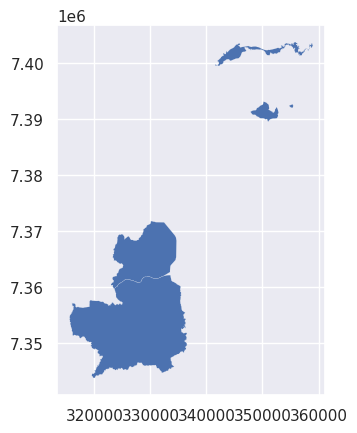

In [19]:
apa.plot()

A camada de áreas de proteção parece estar completamente contida nas camadas de mananciais. Vou avaliar posteriormente para confirmar

### Mananciais

In [20]:
billings = load_asset('manancial_billings')
billings

,geometry,cd_identificador,dc_classe,sg_classe,dc_area_especial,tx_aod,qt_area,qt_perimetro,nm_bacia
0,"POLYGON ((334766.287 7362240.945, 334769.844 7...",339,Sub-área de Ocupação de Baixa,SBD,None,AOD3,9.173212e+05,9715.523057,BILLINGS
1,"POLYGON ((334696.334 7375633.958, 334634.501 7...",957,Sub-área de Ocupação Especial,SOE,None,AOD5,3.482014e+03,258.776979,BILLINGS
2,"POLYGON ((334722.495 7375745.734, 334758.168 7...",958,Sub-área de Ocupação Especial,SOE,None,AOD5,4.898736e+03,441.878369,BILLINGS
3,"POLYGON ((341064.451 7372453.409, 341035.850 7...",1003,Sub-área de Urbanização Controlada,SUCt,None,AOD2,5.343989e+03,359.211325,BILLINGS
4,"POLYGON ((336672.774 7373372.446, 336671.384 7...",1124,Área de Proteção Permanente (Faixa 50 metros),APPB,None,None,4.983536e+03,292.481528,BILLINGS
...,...,...,...,...,...,...,...,...,...
900,"POLYGON ((336709.622 7372870.350, 336913.061 7...",1173,Sub-área de Ocupação Especial,SOE,None,AOD5,9.704538e+05,8069.345558,BILLINGS
901,"POLYGON ((335795.042 7371393.250, 335793.144 7...",1174,Sub-área de Ocupação Especial,SOE,None,AOD5,1.051173e+00,12.311905,BILLINGS
902,"POLYGON ((336692.582 7373456.807, 336702.126 7...",1175,Área de Proteção Permanente (Faixa 50 metros),APPB,None,None,1.646755e+06,65402.927057,BILLINGS
903,"POLYGON ((336015.331 7371441.318, 336010.617 7...",1176,Sub-área de Ocupação de Baixa,SBD,None,AOD3,4.486400e+03,345.256003,BILLINGS


In [21]:
guarapiranga = load_asset('manancial_guarapiranga')
guarapiranga

,geometry,cd_identificador,dc_classe,sg_classe,dc_area_especial,tx_aod,qt_area,qt_perimetro,nm_bacia
0,"POLYGON ((323301.473 7360255.476, 323303.042 7...",1228,Sub-área de Ocupação Diferenciada,SOD,None,None,1.169811e+08,164227.566,GUARAPIRANGA
1,"POLYGON ((315969.586 7363508.702, 315969.585 7...",1229,Sub-área de Ocupação Diferenciada,SOD,None,None,1.169811e+08,164227.566,GUARAPIRANGA
2,"POLYGON ((308184.612 7363746.684, 308213.477 7...",1230,Sub-área de Ocupação Diferenciada,SOD,None,None,1.169811e+08,164227.566,GUARAPIRANGA
3,"POLYGON ((313222.903 7383509.064, 313279.051 7...",1180,Sub-área de Baixa Densidade,SBD,None,None,1.505375e+07,42409.978,GUARAPIRANGA
4,"POLYGON ((314568.643 7364213.378, 314599.638 7...",1231,Sub-área de Ocupação Diferenciada,SOD,None,None,1.169811e+08,164227.566,GUARAPIRANGA
...,...,...,...,...,...,...,...,...,...
138,"POLYGON ((315980.151 7379656.339, 315984.507 7...",1314,Sub-área de Urbanização Controlada,SUCt,None,None,2.139407e+04,638.551,GUARAPIRANGA
139,"POLYGON ((313949.196 7383281.904, 313902.806 7...",1317,Sub-área de Urbanização Controlada,SUCt,None,None,2.540250e+05,2195.097,GUARAPIRANGA
140,"POLYGON ((313170.451 7386263.911, 313065.663 7...",1318,Sub-área de Urbanização Controlada,SUCt,None,None,2.269759e+06,8533.102,GUARAPIRANGA
141,"POLYGON ((313254.204 7386057.715, 313253.984 7...",1319,Sub-área de Urbanização Controlada,SUCt,None,None,3.409000e+00,8.376,GUARAPIRANGA


In [22]:
juquery = load_asset('manancial_juquery')
juquery

,geometry,cd_identificador,dc_classe,sg_classe,dc_area_especial,tx_aod,qt_area,qt_perimetro,nm_bacia
0,"POLYGON ((330314.500 7409285.529, 330321.427 7...",1,Ocupação Diferenciada,SOD,None,None,1.609663e+05,2585.459155,JUQUERY
1,"POLYGON ((329577.710 7415859.310, 329585.437 7...",2,Ocupação Diferenciada,SOD,None,None,3.684948e+05,4686.444654,JUQUERY
2,"POLYGON ((329977.600 7412986.615, 329980.437 7...",3,Ocupação Diferenciada,SOD,None,None,9.176045e+04,2033.906039,JUQUERY
3,"POLYGON ((328855.794 7409783.937, 328867.231 7...",4,Ocupação Diferenciada,SOD,None,None,1.278236e+05,2722.974930,JUQUERY
4,"POLYGON ((328991.653 7412115.883, 328991.653 7...",5,Ocupação Diferenciada,SOD,None,None,1.576087e+04,577.578883,JUQUERY
...,...,...,...,...,...,...,...,...,...
263,"POLYGON ((345655.228 7424865.305, 345664.892 7...",264,Ocupação Diferenciada,SOD,None,None,3.566559e+05,6023.667419,JUQUERY
264,"POLYGON ((345187.829 7424604.538, 345193.469 7...",265,Urbanização Isolada Controlada,SUICt,None,None,1.367224e+05,2006.461669,JUQUERY
265,"POLYGON ((327371.114 7410581.115, 327366.479 7...",266,Baixa Densidade 2,SBD2,None,None,8.748786e+07,273228.136138,JUQUERY
266,"POLYGON ((330879.061 7411952.746, 330903.584 7...",267,Baixa Densidade 2,SBD2,None,None,3.731793e+05,5158.651970,JUQUERY


In [23]:
billings.columns == guarapiranga.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [24]:
guarapiranga.columns == juquery.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

Dado que todas as colunas são iguais e existe uma propriedade que descreve a bacia a qual pertence o manancial, faz mais sentido pensar em uma camada com a combinação dessas 3 camadas.

In [25]:
manancial = pd.concat([billings, guarapiranga, juquery])
manancial

,geometry,cd_identificador,dc_classe,sg_classe,dc_area_especial,tx_aod,qt_area,qt_perimetro,nm_bacia
0,"POLYGON ((334766.287 7362240.945, 334769.844 7...",339,Sub-área de Ocupação de Baixa,SBD,None,AOD3,9.173212e+05,9715.523057,BILLINGS
1,"POLYGON ((334696.334 7375633.958, 334634.501 7...",957,Sub-área de Ocupação Especial,SOE,None,AOD5,3.482014e+03,258.776979,BILLINGS
2,"POLYGON ((334722.495 7375745.734, 334758.168 7...",958,Sub-área de Ocupação Especial,SOE,None,AOD5,4.898736e+03,441.878369,BILLINGS
3,"POLYGON ((341064.451 7372453.409, 341035.850 7...",1003,Sub-área de Urbanização Controlada,SUCt,None,AOD2,5.343989e+03,359.211325,BILLINGS
4,"POLYGON ((336672.774 7373372.446, 336671.384 7...",1124,Área de Proteção Permanente (Faixa 50 metros),APPB,None,None,4.983536e+03,292.481528,BILLINGS
...,...,...,...,...,...,...,...,...,...
263,"POLYGON ((345655.228 7424865.305, 345664.892 7...",264,Ocupação Diferenciada,SOD,None,None,3.566559e+05,6023.667419,JUQUERY
264,"POLYGON ((345187.829 7424604.538, 345193.469 7...",265,Urbanização Isolada Controlada,SUICt,None,None,1.367224e+05,2006.461669,JUQUERY
265,"POLYGON ((327371.114 7410581.115, 327366.479 7...",266,Baixa Densidade 2,SBD2,None,None,8.748786e+07,273228.136138,JUQUERY
266,"POLYGON ((330879.061 7411952.746, 330903.584 7...",267,Baixa Densidade 2,SBD2,None,None,3.731793e+05,5158.651970,JUQUERY


<Axes: >

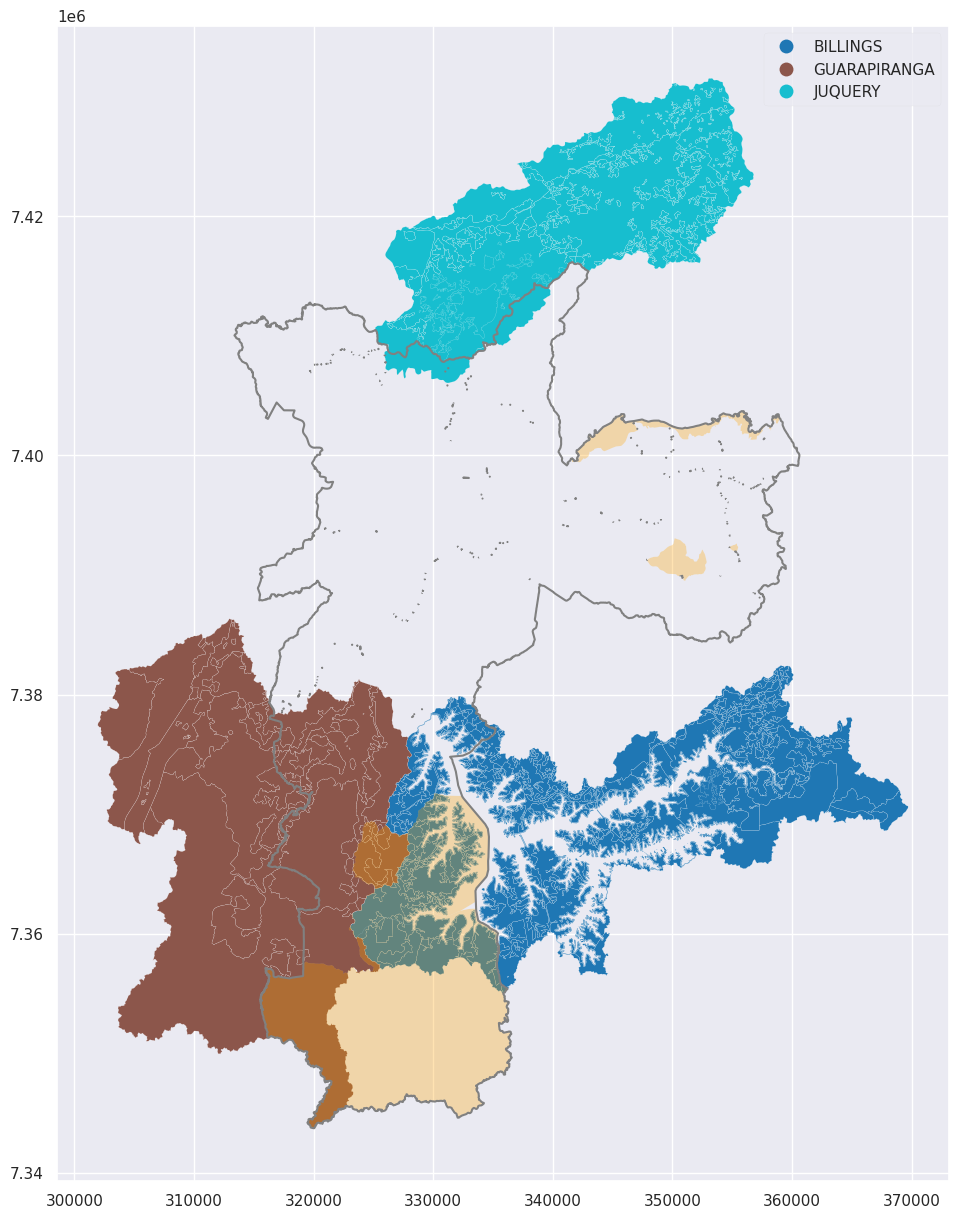

In [26]:
ax = subpref.dissolve().boundary.plot(color='gray', figsize=(15, 15))
manancial.plot(
    ax=ax,
    column='nm_bacia',
    categorical=True,
    legend=True
)
apa.plot(
    ax=ax,
    color='orange',
    alpha=0.3
)

Ao contrário da minha suposição, a camada de área de proteção tem grande proporção sem interseção com as camadas de mananciais. Portanto, manterei todas essas camadas.

### Remanescente PMMA

In [27]:
reman_pmma = load_asset('remanescente_pmma')
reman_pmma

,geometry,cd_identificador,cd_classe_vegetacao,dc_classe_vegetacao,qt_area_hectare,qt_area_metro,nm_projeto,dt_carga,sg_fonte_original
0,"POLYGON ((321540.681 7345982.081, 321538.050 7...",1,BOH,Bosque Heterogeneo,1.01,10139.23,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
1,"POLYGON ((321808.309 7346040.579, 321811.154 7...",2,BOH,Bosque Heterogeneo,2.76,27642.94,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
2,"POLYGON ((322543.752 7346286.033, 322553.299 7...",3,BOH,Bosque Heterogeneo,0.46,4584.43,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
3,"POLYGON ((321879.292 7346359.085, 321861.834 7...",4,BOH,Bosque Heterogeneo,9.98,99827.29,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
4,"POLYGON ((320926.425 7346343.219, 320927.774 7...",5,BOH,Bosque Heterogeneo,7.05,70507.20,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
...,...,...,...,...,...,...,...,...,...
4491,"POLYGON ((314325.951 7408033.953, 314337.857 7...",4492,MOD,Mata Ombrofila Densa,36.13,361336.67,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
4492,"POLYGON ((313941.400 7408001.674, 313941.400 7...",4493,MOD,Mata Ombrofila Densa,0.52,5151.67,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
4493,"POLYGON ((323094.391 7408196.318, 323106.297 7...",4494,MOD,Mata Ombrofila Densa,8.24,82355.45,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA
4494,"POLYGON ((339420.354 7409031.815, 339387.004 7...",4495,MOD,Mata Ombrofila Densa,4.07,40671.68,Plano Municipal de Conservacao e Recuperacao d...,2016-08-29Z,SVMA


<Axes: >

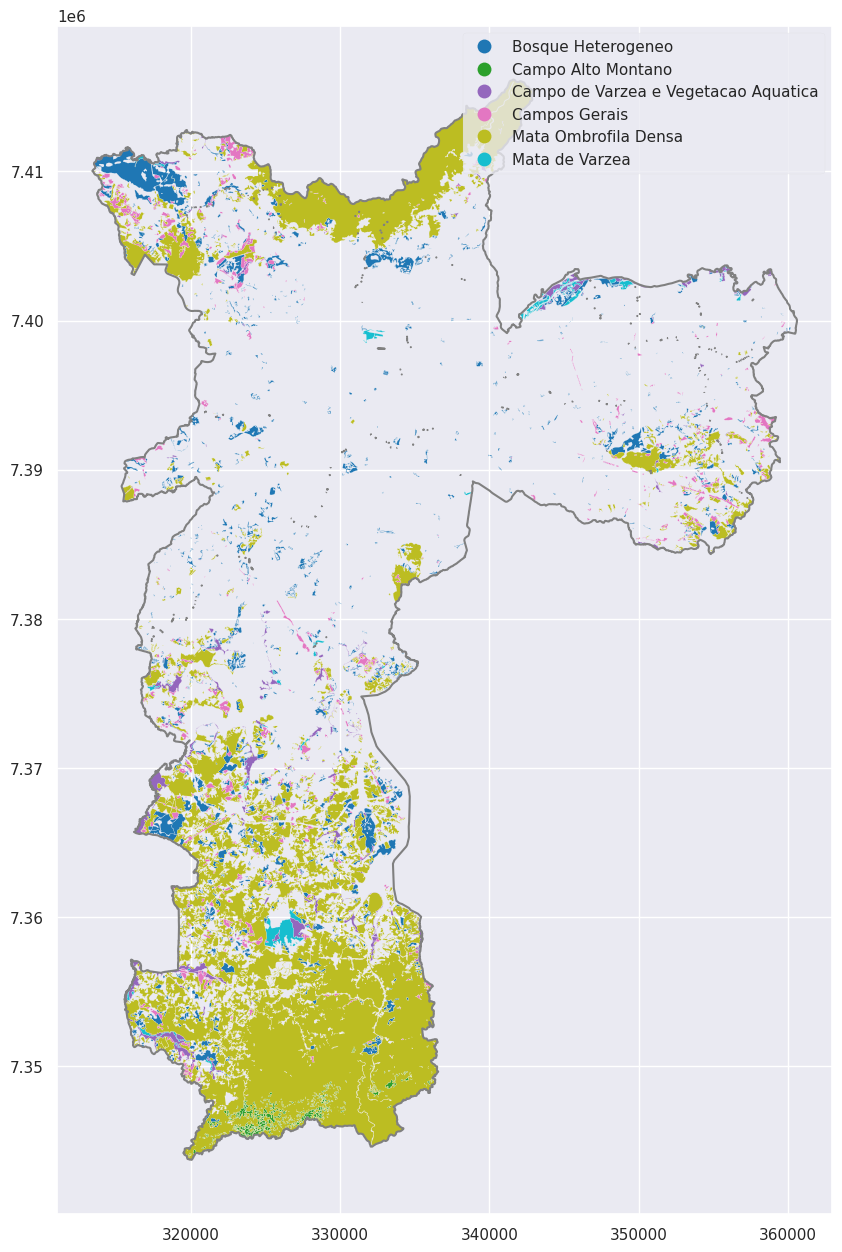

In [28]:
ax = contorno(subpref, figsize=(10,20))
reman_pmma.plot(ax=ax, column='dc_classe_vegetacao', legend=True)

### Represa

In [29]:
represa = load_asset('represa_nivel_maximo')
represa

,geometry,cd_identificador_represa,nm_acidente,dt_atualizacao,cd_tipo_acidente,sg_fonte_original,cd_tipo_discrepancia,qt_perimetro_represa,qt_area_represa
0,"POLYGON ((346289.439 7367196.657, 346292.444 7...",2,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,716.18,16238.73
1,"POLYGON ((346295.123 7369540.726, 346316.090 7...",3,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,1671.74,70532.63
2,"POLYGON ((349808.296 7370244.097, 349815.025 7...",4,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,1008.68,56700.63
3,"POLYGON ((343468.737 7370490.320, 343499.327 7...",5,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,904.59,44841.53
4,"POLYGON ((347317.450 7373031.992, 347334.094 7...",6,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,1392.60,66112.47
5,"POLYGON ((355439.336 7373440.249, 355489.930 7...",8,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,729.83,14974.26
6,"POLYGON ((352803.735 7376583.396, 352814.168 7...",9,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,99002.07,15644640.95
7,"POLYGON ((337249.781 7368284.549, 337248.670 7...",10,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,241519.91,33774189.40
8,"POLYGON ((348773.814 7364748.204, 348771.696 7...",1,Billings,2021-06-03T03:00:00Z,REP,GEOINFO,0,90143.34,6310576.53
9,"POLYGON ((323835.730 7381226.051, 323836.620 7...",11,Guarapiranga,2021-06-03T03:00:00Z,REP,GEOINFO,0,113924.28,32969672.35


In [30]:
represa.cd_tipo_acidente.unique()

array(['REP'], dtype=object)

### Compromisso ambiental?

In [31]:
comp_ambiental = load_asset('termo_compromisso_ambiental_svma')
comp_ambiental.T

,0,1,2,3,4,5,6,7,8,9,...,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937
geometry,MULTIPOLYGON (((331071.94881668 7394342.310630...,MULTIPOLYGON (((342758.80436138 7390269.429976...,MULTIPOLYGON (((329713.18987239 7390567.422068...,MULTIPOLYGON (((331681.77274927 7391813.942838...,MULTIPOLYGON (((328203.55439638 7390529.629471...,MULTIPOLYGON (((325754.84363279 7380383.266840...,MULTIPOLYGON (((329154.60410172 7396941.287762...,MULTIPOLYGON (((326903.54129985 7392977.980143...,MULTIPOLYGON (((326288.00235361 7386438.359925...,MULTIPOLYGON (((326070.53625545 7382299.687421...,...,MULTIPOLYGON (((335377.76405881 7403975.116390...,MULTIPOLYGON (((322739.42440132 7395067.804714...,MULTIPOLYGON (((333988.63448367 7401372.182872...,MULTIPOLYGON (((334438.33293185 7383660.024210...,MULTIPOLYGON (((327541.42475435 7396413.945812...,MULTIPOLYGON (((328956.27659444 7386432.465420...,MULTIPOLYGON (((319421.05580491 7380817.885258...,MULTIPOLYGON (((334006.80101754 7398676.185967...,MULTIPOLYGON (((336528.31214092 7395260.160305...,MULTIPOLYGON (((332384.18727286 7386310.163850...
cd_identificador_termo_compromisso_ambiental,1,2,3,4,5,6,7,8,9,10,...,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938
cd_identificador_original_tca,1687,3396,2310,182,1865,3863,250,2286,1082,3973,...,2374,2635,412,242,862,905,4040,3057,3088,1996
dt_carga,2021-11-30T11:50:42Z,2022-09-20T17:01:09Z,2021-09-23T12:44:56Z,2021-11-19T18:06:30Z,2023-04-28T12:18:31Z,2023-05-25T13:25:04Z,2021-06-15T13:48:37Z,2022-04-26T13:05:15Z,2021-06-15T13:48:37Z,2023-06-23T14:52:47Z,...,2021-11-11T18:16:49Z,2022-05-04T12:48:30Z,2022-10-24T15:51:29Z,2021-08-05T16:35:33Z,2022-10-17T14:52:54Z,2021-06-15T13:48:37Z,2023-07-19T18:12:30Z,2022-09-20T17:01:09Z,2022-09-20T18:49:39Z,2021-06-15T13:48:37Z
cd_processo,6068.2018.0003552-4,2013-0.301.428-5,6027.2021/0009249-0,2014-0.159.868-0,6027.2018/0005337-5,6068.2022/0010598-8,2015-0.088.838-5,2015-0.060.677-0,2017-0.153.321-5,6024.2023/0004769-6,...,6027.2021/0008016-5,6027.2021/0014247-0,2013-0.183.408-0,2014-0.239.961-4,2016-0.201.324-8,2012-0.292.445-6,6027.2023/0007566-1,2011-0.205.787-4,2013-0.181.468-3,6066.2019/0007998-0
cd_tca,036/2020,397/2014,297/2021,186/2015,208/2020,143/2023,257/2015,280/2021,144/2018,277/2023,...,364/2021,161/2022,431/2015,249/2015,029/2017,075/2017,328/2023,058/2014,089/2014,343/2020
nm_interessado,AR 23 INCORPORAÇÃO E CONSTRUÇÃO SPE LTDA,DIÁLOGO XV EMPREENDIMENTOS IMOBILIÁRIOS LTDA,SEED RESIDENCIAL 21 SPE LTDA,LUSA 2 EMPREENDIMENTOS IMOBILIÁRIOS LTDA,FUNDO DE INVESTIMENTO IMOBILIARIO FL 3500 I FII,VALE REAL EMPREENDIMENTOS IMOBILIÁRIOS LTDA,AIROSA EMPREENDIMENTOS IMOBILIÁRIOS LTDA E ALP...,LUCIO MAIA EMPREENDIMENTO IMOBILIÁRIO SPE LTDA,COMPANHIA DO METROPOLITANO DE SÃO PAULO - METRÔ,SECRETARIA MUNICIPAL DE ASSISTÊNCIA E DESENVOL...,...,CAETANO TADEU LO RÉ,ELETROPAULO METROPOLITANA ELETRICIDADE DE SAO ...,COMPANHIA DE DESENVOLVIMENTO HABITACIONAL E UR...,SECRETARIA DE PLANEJAMENTO E DESENVOLVIMENTO R...,SOCIEDADE BENEFICENTE SÃO CAMILO,ROBERTO MARINHO EMPREENDIMENTO IMOBILIÁRIO LTDA,PLANALTINA 32 INCORPORADORA SPE LTDA.,VOLUNTÁRIOS DA PÁTRIA 774 EMPREENDIMENTOS IMOB...,CAJURU 74 EMPREENDIMENTOS IMOBILIÁRIOS LTDA,AR 15 EMPREENDIMENTOS IMOBILIÁRIOS SPE LTDA
tx_finalidade,Construção de Edifício de Uso Misto /R2v2/nr1-...,Construção de conjunto residencial,Construção de Condomínio residencial /R2h-3/ZE...,Construção de Edifício Residencial,Reforma de Edificio Não Residencial / nR1-6 / ZM,Projeto Construção de Empreendimento (EHMP - H...,Construção de um Edifício Residencial,Construção de um edifício residencial vertical...,Implantação do aceso à Estação Morumbi – Linha...,Construção de Conjunto HIS,...,Construção de Residência Unifamiliar - R1 - ZE...,"Reforma do Ramal Aéreo de Estação - RAE, denom...",Construção de Conjunto Habitacional (HIS),Reforma do Centro de Exposições Imigrantes,Serviços de Saúde – Hospital,Construção de edifício de serviços profissiona...,Alvará de Aprovação de Edif. Nova/EHIS-2 - R2V...,

### Transpetro - duto

In [32]:
transpetro = load_asset('transpetro_duto')
transpetro

,geometry,cd_identificador_transpetro_duto
0,"LINESTRING (350493.989 7399390.374, 350515.605...",53
1,"LINESTRING (350511.453 7399404.216, 350517.739...",54
2,"LINESTRING (333567.282 7381028.852, 333613.108...",1
3,"LINESTRING (320300.802 7397282.473, 320296.422...",2
4,"LINESTRING (320296.422 7397281.409, 320298.272...",3
...,...,...
749,"LINESTRING (357525.394 7387699.383, 357448.988...",750
750,"LINESTRING (357542.367 7387674.510, 357466.274...",751
751,"LINESTRING (358278.242 7388157.478, 358219.194...",752
752,"LINESTRING (358294.999 7388132.456, 358239.196...",753


### Massa d'água

In [33]:
massa = load_asset('massa_d_agua')
massa

,geometry,cd_identificador_hidrografia_poligono,nm_acidente,dt_atualizacao,cd_tipo_acidente,sg_fonte_original,cd_tipo_discrepancia,qt_perimetro_hidrografia_poligono,qt_area_hidrografia_poligono
0,"POLYGON ((322745.308 7346103.586, 322747.828 7...",1,SEM DENOMINACAO,2021-06-03T03:00:00Z,ND,GEOINFO,0,218.37849,2351.84283
1,"POLYGON ((322682.697 7346280.846, 322680.977 7...",2,SEM DENOMINACAO,2021-06-03T03:00:00Z,ND,GEOINFO,0,95.27010,612.78036
2,"POLYGON ((321536.635 7346888.371, 321535.395 7...",3,SEM DENOMINACAO,2021-06-03T03:00:00Z,ND,GEOINFO,0,83.44024,425.38574
3,"POLYGON ((335185.862 7348185.431, 335192.282 7...",4,SEM DENOMINACAO,2021-06-03T03:00:00Z,COR,GEOINFO,0,1593.82145,4162.24330
4,"POLYGON ((331869.148 7348623.061, 331876.188 7...",5,SEM DENOMINACAO,2021-06-03T03:00:00Z,ND,GEOINFO,0,180.81864,791.22151
...,...,...,...,...,...,...,...,...,...
4001,"POLYGON ((337505.088 7402150.112, 337509.103 7...",4002,Córrego Paciência,2021-06-03T03:00:00Z,MAS,GEOINFO,0,83.17691,102.19531
4002,"POLYGON ((337473.165 7402126.105, 337475.140 7...",4003,Córrego Paciência,2021-06-03T03:00:00Z,MAS,GEOINFO,0,61.19671,90.54193
4003,"POLYGON ((338413.065 7388281.622, 338436.897 7...",4004,SEM DENOMINACAO,2021-06-03T03:00:00Z,MAS,GEOINFO,0,590.27197,391.26358
4004,"POLYGON ((320652.495 7410868.819, 320651.927 7...",4005,RIBEIRAO DO PERUS,2021-06-03T03:00:00Z,RIB,GEOINFO,0,5076.31941,18142.02272


In [34]:
massa[['nm_acidente', 'cd_tipo_acidente']].drop_duplicates()

,nm_acidente,cd_tipo_acidente
0,SEM DENOMINACAO,ND
3,SEM DENOMINACAO,COR
159,RIO EMBU-GUACU,RIO
453,SEM DENOMINACAO,LAG
1453,Córrego Pedreiras,ND
...,...,...
3967,CANAL DO RIO TIETE,RIO
3983,Córrego Tanque,MAS
3988,Córrego Caguaçu,MAS
3989,Córrego Caguaçu,COR


In [35]:
massa[[
    'geometry',
    'cd_identificador_hidrografia_poligono',
    'nm_acidente',
    'cd_tipo_acidente'
]]

,geometry,cd_identificador_hidrografia_poligono,nm_acidente,cd_tipo_acidente
0,"POLYGON ((322745.308 7346103.586, 322747.828 7...",1,SEM DENOMINACAO,ND
1,"POLYGON ((322682.697 7346280.846, 322680.977 7...",2,SEM DENOMINACAO,ND
2,"POLYGON ((321536.635 7346888.371, 321535.395 7...",3,SEM DENOMINACAO,ND
3,"POLYGON ((335185.862 7348185.431, 335192.282 7...",4,SEM DENOMINACAO,COR
4,"POLYGON ((331869.148 7348623.061, 331876.188 7...",5,SEM DENOMINACAO,ND
...,...,...,...,...
4001,"POLYGON ((337505.088 7402150.112, 337509.103 7...",4002,Córrego Paciência,MAS
4002,"POLYGON ((337473.165 7402126.105, 337475.140 7...",4003,Córrego Paciência,MAS
4003,"POLYGON ((338413.065 7388281.622, 338436.897 7...",4004,SEM DENOMINACAO,MAS
4004,"POLYGON ((320652.495 7410868.819, 320651.927 7...",4005,RIBEIRAO DO PERUS,RIB


### Rompimento galeria pluvial

In [36]:
romp_pluvial = load_from_geosampa('sac_rompimento_galeria_agua_pluvial')
romp_pluvial

/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_cortico_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_favela_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_loteamento_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_nucleo_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geotecnica_linha
  warnings.warn(f"Could not i

,geometry,cd_identificador,cd_identificador_original_atendimento_cidadao,dt_abertura,nm_logradouro,nr_logradouro,dt_parecer,sg_orgao_responsavel,tx_situacao_solicitacao,tx_canal_atendimento,dc_tema,dc_assunto,dc_servico,dt_carga
0,POINT (324718.024 7403317.626),56895,None,2020-07-06T20:55:08Z,Rua Núcleo Bandeirante,None,2020-07-08T19:46:44Z,SMSU/Defesa Civil,FINALIZADA,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
1,POINT (353109.626 7389012.862),56896,None,2020-07-08T19:49:09Z,Rua João Roiz de Sá,None,2020-07-08T20:36:20Z,SMSU/Defesa Civil,FINALIZADA,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
2,POINT (328950.312 7394945.007),56897,None,2020-07-08T21:07:29Z,Rua Ataláia,None,2020-07-09T15:59:13Z,SMSU/Defesa Civil,FINALIZADA,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
3,POINT (335252.414 7401560.470),56898,None,2020-07-13T20:52:49Z,Avenida Águas de São Pedro,None,2020-07-13T21:30:24Z,SMSU/Defesa Civil,INDEFERIDO,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
4,POINT (352573.412 7400525.707),56899,None,2020-07-13T23:00:46Z,Avenida Pires do Rio,None,2020-07-14T15:52:48Z,SMSU/Defesa Civil,FINALIZADA,PRAÇAS DE ATENDIMENTO DAS SUBPREFEITURAS,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
5,POINT (353043.743 7386028.892),56900,None,2020-07-14T02:45:33Z,Rua Mearin,None,2020-07-14T02:59:32Z,SMSU/Defesa Civil,INDEFERIDO,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
6,POINT (319295.261 7390616.154),56901,None,2020-07-24T17:42:16Z,Avenida Doutor Silvio Margarido,None,2020-07-24T17:51:47Z,SMSU/Defesa Civil,FINALIZADA,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
7,POINT (356321.875 7393529.906),56902,None,2020-07-24T20:59:33Z,Avenida José Higino Neves,None,2020-07-25T00:29:37Z,SMSU/Defesa Civil,FINALIZADA,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
8,POINT (355844.343 7401786.936),56903,None,2020-08-05T18:51:24Z,Rua Salsa Parrilha,None,2020-08-06T00:21:50Z,SMSU/Defesa Civil,INDEFERIDO,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z
9,POINT (331617.397 7395026.809),56904,None,2020-08-07T19:58:41Z,Rua Maria Antônia,None,2020-08-08T01:18:32Z,SMSU/Defesa Civil,FINALIZADA,CENTRAL TELEFÔNICA,Urgência,Defesa Civil,Rompimento de galeria de águas pluviais,2021-03-25Z


In [37]:
romp_pluvial['tx_situacao_solicitacao'].unique()

array(['FINALIZADA', 'INDEFERIDO'], dtype=object)

In [38]:
pd.to_datetime(romp_pluvial['dt_parecer']).describe()

count                                     47
mean     2020-06-26 12:07:15.276595968+00:00
min                2020-04-08 20:39:31+00:00
25%         2020-05-08 17:15:29.500000+00:00
50%                2020-06-27 20:05:15+00:00
75%                2020-08-07 00:50:11+00:00
max                2020-10-01 14:53:52+00:00
Name: dt_parecer, dtype: object

Apesar de parecer inicialmente interessante, os resgistros parecem antigos e é difícil compreender o que se pode entender por "INDEFERIDO" no texto de situação da solicitação (indeferido por qual motivo? Não havia necessidade? Não era possível acessar a galeria? Etc.). Por esses motivos, acho que não vale a pena utilizarmos essa camada

### Sugestão de obra de drenagem de córrego

In [39]:
sugestao_drenagem = load_from_geosampa('sac_sugestao_obra_drenagem_corrego')
sugestao_drenagem

/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_cortico_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_favela_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_loteamento_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_nucleo_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geotecnica_linha
  warnings.warn(f"Could not i

,geometry,cd_identificador,cd_identificador_original_atendimento_cidadao,dt_abertura,nm_logradouro,nr_logradouro,dt_parecer,sg_orgao_responsavel,tx_situacao_solicitacao,tx_canal_atendimento,dc_tema,dc_assunto,dc_servico,dt_carga
0,POINT (336846.206 7403596.188),45106,None,2020-07-03T23:10:34Z,Avenida Mazzei,1524,2020-07-06T18:00:01Z,SMSO,FINALIZADA,PORTAL ONLINE,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
1,POINT (338180.973 7402215.306),45107,None,2020-07-05T22:04:30Z,Rua Júlia Correia de Lima,126,2020-07-06T18:06:53Z,SMSO,FINALIZADA,PORTAL ONLINE,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
2,POINT (334258.012 7387595.653),45108,None,2020-07-06T18:01:53Z,Avenida Bosque da Saúde,1480,2020-07-06T18:12:39Z,SMSO,FINALIZADA,CENTRAL TELEFÔNICA,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
3,POINT (322811.602 7386988.929),45109,None,2020-07-06T20:32:23Z,Rua Domingos Lopes da Silva,261,2020-07-07T17:17:29Z,SMSO,FINALIZADA,PORTAL ONLINE,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
4,POINT (355054.763 7401074.171),45110,None,2020-07-08T15:02:13Z,Avenida Marechal Tito,2780,2020-07-08T17:23:49Z,SMSO,FINALIZADA,CENTRAL TELEFÔNICA,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,POINT (335102.750 7404730.175),45189,None,2020-06-29T19:51:22Z,Rua Gomes Teixeira,83,2020-06-29T20:05:57Z,SMSO,FINALIZADA,PORTAL ONLINE,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
84,POINT (350994.962 7398747.793),45190,None,2020-06-30T12:44:21Z,Rua Pantanais do Mato Grosso,654,2020-06-30T13:40:43Z,SMSO,FINALIZADA,PORTAL ONLINE,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
85,POINT (329278.216 7400701.918),45191,None,2020-06-30T12:55:22Z,Rua Augusto Franco de Sousa,91,2020-06-30T13:41:20Z,SMSO,FINALIZADA,PORTAL ONLINE,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z
86,POINT (338258.303 7389835.499),45192,None,2020-06-30T17:50:34Z,Avenida Doutor Francisco Mesquita,1000,2020-07-01T15:36:08Z,SMSO,FINALIZADA,CENTRAL TELEFÔNICA,Meio Ambiente,Rios e Córregos,Sugerir obras de drenagem em córregos,2021-03-25Z


In [40]:
sugestao_drenagem['tx_situacao_solicitacao'].unique()

array(['FINALIZADA'], dtype=object)

Idem ao caso anterior.

### Risco de alagamento

In [41]:
risco_alag = load_from_geosampa('risco_ocorrencia_alagamento')
risco_alag

/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_cortico_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_favela_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_loteamento_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_nucleo_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geotecnica_linha
  warnings.warn(f"Could not i

,geometry,cd_identificador,dt_ocorrencia,dc_tipo_ocorrencia,nm_distrito,dt_carga,nm_subprefeitura,sg_fonte_original
0,POINT (334269.791 7400916.230),638,2023-02-01Z,ALAGAMENTO,None,2023-09-15Z,ST - SANTANA-TUCURUVI,SIGRC
1,POINT (353288.721 7390108.439),640,2023-02-01Z,ALAGAMENTO,None,2023-09-15Z,IQ - ITAQUERA,SIGRC
2,POINT (350820.931 7402080.448),641,2023-02-01Z,ALAGAMENTO,None,2023-09-15Z,MP - SAO MIGUEL,SIGRC
3,POINT (350360.392 7393708.581),658,2023-02-01Z,ALAGAMENTO,None,2023-09-15Z,IQ - ITAQUERA,SIGRC
4,POINT (351419.579 7399619.142),671,2023-02-01Z,ALAGAMENTO,None,2023-09-15Z,MP - SAO MIGUEL,SIGRC
...,...,...,...,...,...,...,...,...
249,POINT (356282.746 7402617.842),2800,2023-06-01Z,ALAGAMENTO,None,2023-09-15Z,MP - SAO MIGUEL,SIGRC
250,POINT (317670.724 7389356.716),2867,2023-06-16Z,ALAGAMENTO,None,2023-09-15Z,BT - BUTANTA,SIGRC
251,POINT (317527.813 7378452.688),2900,2023-06-28Z,ALAGAMENTO,None,2023-09-15Z,MB - M BOI MIRIM,SIGRC
252,POINT (328097.264 7385687.738),3115,2023-08-07Z,ALAGAMENTO,None,2023-09-15Z,SA - SANTO AMARO,SIGRC


### Risco de inundação

In [42]:
risco_inund = load_from_geosampa('risco_ocorrencia_inundacao')
risco_inund

/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_cortico_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_favela_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_loteamento_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geohabisp_vw_wfs_nucleo_geosampa
  warnings.warn(f"Could not identify id col for feature {feature_name}")
/git/hydra/hydra/utils/geosampa_client/parsers.py:52: UserWarning: Could not identify id col for feature geotecnica_linha
  warnings.warn(f"Could not i

,geometry,cd_identificador,dt_ocorrencia,dc_tipo_ocorrencia,nm_distrito,dt_carga,nm_subprefeitura,sg_fonte_original
0,POINT (351422.442 7398375.396),639,2023-02-01Z,INUNDACAO,None,2023-09-15Z,IQ - ITAQUERA,SIGRC
1,POINT (353084.744 7390212.824),646,2023-02-01Z,INUNDACAO,None,2023-09-15Z,SM - SAO MATEUS,SIGRC
2,POINT (351366.422 7401519.180),647,2023-02-01Z,INUNDACAO,None,2023-09-15Z,MP - SAO MIGUEL,SIGRC
3,POINT (315503.829 7406528.465),648,2023-02-01Z,INUNDACAO,None,2023-09-15Z,PR - PERUS,SIGRC
4,POINT (351452.584 7385738.890),650,2023-02-01Z,INUNDACAO,None,2023-09-15Z,SM - SAO MATEUS,SIGRC
...,...,...,...,...,...,...,...,...
394,POINT (317680.282 7389364.578),2613,2023-04-18Z,INUNDACAO,None,2023-09-15Z,BT - BUTANTA,SIGRC
395,POINT (348995.726 7389504.232),2699,2023-05-03Z,INUNDACAO,None,2023-09-15Z,SM - SAO MATEUS,SIGRC
396,POINT (316569.797 7380388.350),2708,2023-05-02Z,INUNDACAO,None,2023-09-15Z,CL - CAMPO LIMPO,SIGRC
397,POINT (329977.464 7372800.115),3139,2023-08-09Z,INUNDACAO,None,2023-09-15Z,CS - CAPELA DO SOCORRO,SIGRC
